In [2]:
import pandas as pd

df = pd.read_csv("Bitcoin.csv")
y = df.Bitcoin

In [14]:
import numpy as np

y = np.array(y)


def MoveAverage(y, N):
    Mt = [y[0]] * N
    for i in range(N + 1, len(y) + 2):
        M = y[i - N - 1:i - 1].mean()
        Mt.append(M)
    return Mt


yt3 = MoveAverage(y, 30)
yt5 = MoveAverage(y, 80)
s3 = np.sqrt(((y[3:] - yt3[3:-1]) ** 2).mean())
s5 = np.sqrt(((y[5:] - yt5[5:-1]) ** 2).mean())

import pandas as pd

d = pd.DataFrame(np.c_[np.r_[y, [' ']], np.r_[yt3], np.r_[yt5]])
f = pd.ExcelWriter('move_average_example.xlsx')
d.to_excel(f)
f.close()

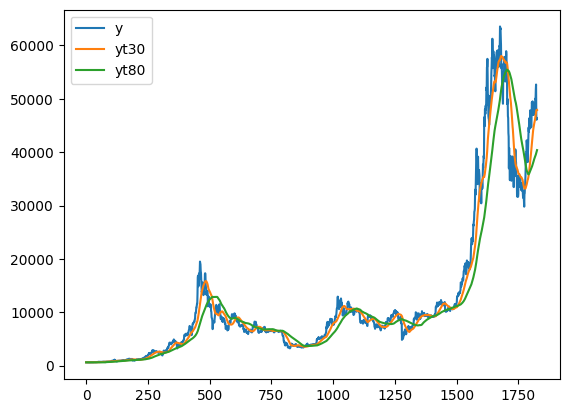

In [15]:
import matplotlib.pyplot as plt

plt.plot(y, label='y')
plt.plot(yt3, label='yt30')
plt.plot(yt5, label='yt80')
plt.legend()
plt.show()

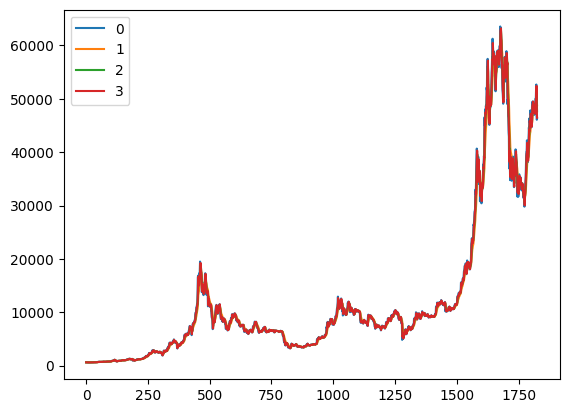

             0             1             2             3
0       621.65    621.650000    621.650000    621.650000
1       609.67    621.650000    621.650000    621.650000
2       610.92    619.254000    615.660000    612.066000
3       608.82    617.587200    613.290000    611.149200
4       610.38    615.833760    611.055000    609.285840
...        ...           ...           ...           ...
1821  51769.06  48932.542575  49673.293357  49930.341759
1822  52677.40  49499.846060  50721.176679  51401.316352
1823  46809.17  50135.356848  51699.288339  52422.183270
1824  46078.38  49470.119478  49254.229170  47931.772654
1825  46368.69  48791.771583  47666.304585  46449.058531

[1826 rows x 4 columns]


In [18]:
import numpy as np
import pandas as pd


def ExpMove(y, a):
    n = len(y)
    M = np.zeros(n)
    #M[0]=(y[0]+y[1])/2
    M[0] = y[0]
    for i in range(1, len(y)):
        M[i] = a * y[i - 1] + (1 - a) * M[i - 1]
    return M


yt1 = ExpMove(y, 0.2)
yt2 = ExpMove(y, 0.5)
yt3 = ExpMove(y, 0.8)
s1 = np.sqrt(((y - yt1) ** 2).mean())
s2 = np.sqrt(((y - yt2) ** 2).mean())
s3 = np.sqrt(((y - yt3) ** 2).mean())
d = pd.DataFrame(np.c_[y, yt1, yt2, yt3])
f = pd.ExcelWriter('exp_smooth_example.xlsx')
d.to_excel(f)
f.close()
d.plot()
plt.show()
print(d)